# Data Ted
## Analisi dei Ted Talk sul COVID-19
---
#### Matano Francesco S5253162
#### Vassallo Edoardo S4965918 

## Introduzione
> ### Nel nostro progetto di Introduzione alla Data Science abbiamo deciso di controllare l'evoluzione del numero di view e di like sui vari argomenti: COVID, climate altri (da aggiungere dopo) contenuti nei titoli dei ted talk.

# Codice
> ## Librerie importate


In [1]:
##LIB FOR UTIL THING
import matplotlib.pyplot as plt 
import numpy as np
import re
##LIB FOR ML THING
import pandas as pd 
import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import datetime as dt

> ## Funzioni utilizzate per il notebook

In [2]:
def print_stats_field(df, field):
    print("---------------------------------------")
    print("Statics statics data of field: ", field)
    print("---------------------------------------")
    print("mean:   ",  df[field].mean()  )
    print("std:    ",  df[field].std()   ) 
    print("var:    ",  df[field].var()   )
    print('mode:   ',  df[field].mode()[0]  )
    print('median: ',  df[field].median())
    print("---------------------------------------")

In [3]:
def show_online_video(df, groubByTitle):
    df.groupby(daTed.date.dt.year)['title'].count().plot( kind='bar', 
                                                             figsize=(10, 5), 
                                                             ylabel="video", 
                                                             xlabel="anno", 
                                                             title= groubByTitle
                                                           )

In [4]:
def all_dim_olap(olap_df, xlabel, ylabel, name_list):

    cols = (len(name_list) // 2) + 1

    plt.figure(figsize=(10, 15))

    for x in range(0, len(name_list)):
        plt.subplot(cols, 2, x+1)
        plt.title(name_list[x])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.imshow(olap_df[:, :, x])
        plt.colorbar()

        for (j,i),label in np.ndenumerate(olap_df[:, :, x]):
            plt.text(i,j,label,ha='center',va='center')

    plt.show()

In [5]:
def print_ttest_1samp(first_dataset, second_dataset, column, name):
    t, p_value = stats.ttest_1samp(first_dataset[column].values, second_dataset[column].mean())
    print("\nt-test on ", name, ":")
    print('Valore test: ', t)
    print('P-value: ', p_value)

def print_chi_squared(obs, exp, name):
    chi_squared, p_value = stats.chisquare(f_obs = film_recenti, f_exp = imdb_score_altri_servizi)
    print("\nt-test on ", name, ":")
    print('Chi-quadrato: ', chi_squared)
    print('P-value: ', p_value)

In [6]:
## Array globali creati per l'utilizzo all'interno del notebook
theme_list     = ["climate", "COVID", "health", "war", "AI"]
quantize_date  = ['70\'s', '80\'s','90\'s','00\'s','10\'s', '20\'s']
quantize_views = ['<10K', '10K-100K','100K-500K','500K-1M','1M-20M', '>20M']
quantize_likes = ['<10K', '10K-100K','100K-500K','500K-1M', '>1M']

---

# Import e Stampa del Dataset utilizzato nel progetto

In [7]:
daTed = pd.read_csv("data_ted.csv") # data_ted.csv")

In [40]:
daTed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   title                5440 non-null   object        
 1   author               5440 non-null   object        
 2   date                 5440 non-null   datetime64[ns]
 3   views                5440 non-null   int64         
 4   likes                5440 non-null   int64         
 5   link                 5440 non-null   object        
 6   date_quant           4691 non-null   object        
 7   views_quant          5440 non-null   object        
 8   likes_quant          5428 non-null   object        
 9   theme                297 non-null    object        
 10  above_average_views  5440 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 467.6+ KB


In [9]:
daTed.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


## 0. Objectives
> ###  Visualizzazione e studio dei TED Talk sul COVID-19 

## 1. Spring Cleaning
> + #### Substitute Nan author with Ted (1 row)
> + #### Debby Millman 2020 June correct date
> + #### Innovations in sleep 2020 July
> + #### Verdere se il formato della data nei campi è corretto

> + ##### Substitute Nan author with Ted (1 row)

In [10]:
i = daTed['author'].isnull()
daTed['author'] = np.where(daTed['author'].isnull() == True, 'Ted',  daTed['author'])

> + ##### Debby Millman 2020 June correct date

In [11]:
daTed.loc[(daTed['author'] == 'Debbie Millman') & (daTed['date'] == 'January 1970'), 'date'] = 'June 2020'
daTed.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


> + ##### Innovations in sleep 2020 July

In [12]:
daTed.loc[(daTed['title'] == 'Innovations in sleep') & (daTed['date'] == 'January 1970'), 'date'] = 'July 2020'

> + ##### Verdere se il formato della data nei campi è corretto

In [13]:
daTed["date"] = pd.to_datetime(daTed['date'], format='%B %Y')

## 2.  Looking at the data

> #### Visualizzazione: media, deviazione standard, varianza, moda, mediana del dataset originale

In [14]:
print_stats_field(daTed, 'views')
print_stats_field(daTed, 'likes') 

---------------------------------------
Statics statics data of field:  views
---------------------------------------
mean:    2061575.9579044117
std:     3567097.765115676
var:     12724186465893.252
mode:    1300000
median:  1300000.0
---------------------------------------
---------------------------------------
Statics statics data of field:  likes
---------------------------------------
mean:    62607.616727941175
std:     107646.76946116687
var:     11587826975.425608
mode:    39000
median:  40500.0
---------------------------------------


> #### Abbiamo poi deciso di prendere i TED talk che contenevano nel nome del titolo uno dei seguenti problemi di attualità: COVID e climate

In [15]:
daClimate = daTed.loc[daTed["title"].str.contains("climate")]
daCovid   = daTed.loc[daTed["title"].str.contains("COVID")]
daHealth  = daTed.loc[daTed["title"].str.contains("health")]
daWar     = daTed.loc[daTed["title"].str.contains("war")]
daAI      = daTed.loc[daTed["title"].str.contains("AI")]
daTeen    = daTed.loc[daTed["title"].str.contains("teen")]

> #### Controllato le statistiche dei due nuovi dataframe raccolti (climate e COVID), per vedere se questi argomenti raccogliessero un numero maggiore di like e di visualizzazioni rispetto alla media

In [16]:
print("--->daClimate")
print_stats_field(daClimate, 'views')
print_stats_field(daClimate, 'likes') 
print("--->daCovid")
print_stats_field(daCovid, 'views')
print_stats_field(daCovid, 'likes') 

--->daClimate
---------------------------------------
Statics statics data of field:  views
---------------------------------------
mean:    1376275.5813953488
std:     1169497.4493281087
var:     1367724283984.9521
mode:    1200000
median:  1300000.0
---------------------------------------
---------------------------------------
Statics statics data of field:  likes
---------------------------------------
mean:    41930.813953488374
std:     35453.671606598225
var:     1256962830.388509
mode:    39000
median:  39000.0
---------------------------------------
--->daCovid
---------------------------------------
Statics statics data of field:  views
---------------------------------------
mean:    1087500.0
std:     908274.100756629
var:     824961842105.2632
mode:    1300000
median:  1250000.0
---------------------------------------
---------------------------------------
Statics statics data of field:  likes
---------------------------------------
mean:    33212.45
std:     27644.229340

> #### Scatter plot del numero di view avute nei vari anni del dataframe originale, di quello con solo i titoli contenti la parola COVID e di quelli con la parola climate.

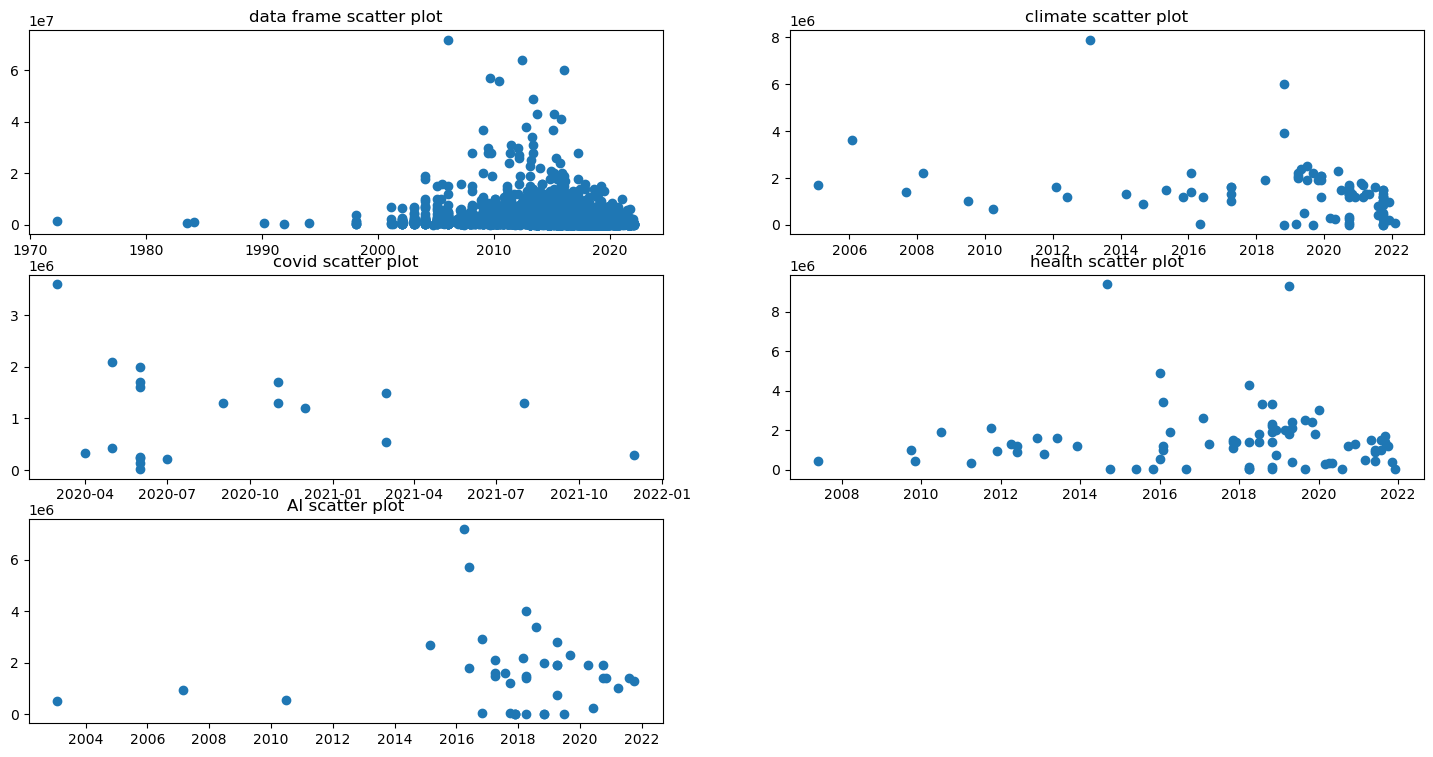

In [43]:
plt.figure(figsize=(18, 9))


plt.subplot(3, 2, 1)
plt.title("data frame scatter plot")
plt.scatter(daTed["date"].values, daTed["views"].values)

plt.subplot(3, 2, 2)
plt.title("climate scatter plot")
plt.scatter(daClimate["date"].values, daClimate["views"].values)

plt.subplot(3, 2, 3)
plt.title("covid scatter plot")
plt.scatter(daCovid["date"].values, daCovid["views"].values)

plt.subplot(3, 2, 4)
plt.title("health scatter plot")
plt.scatter(daHealth["date"].values, daHealth["views"].values)

plt.subplot(3, 2, 5)
plt.title("AI scatter plot")
plt.scatter(daAI["date"].values, daAI["views"].values)

plt.show()


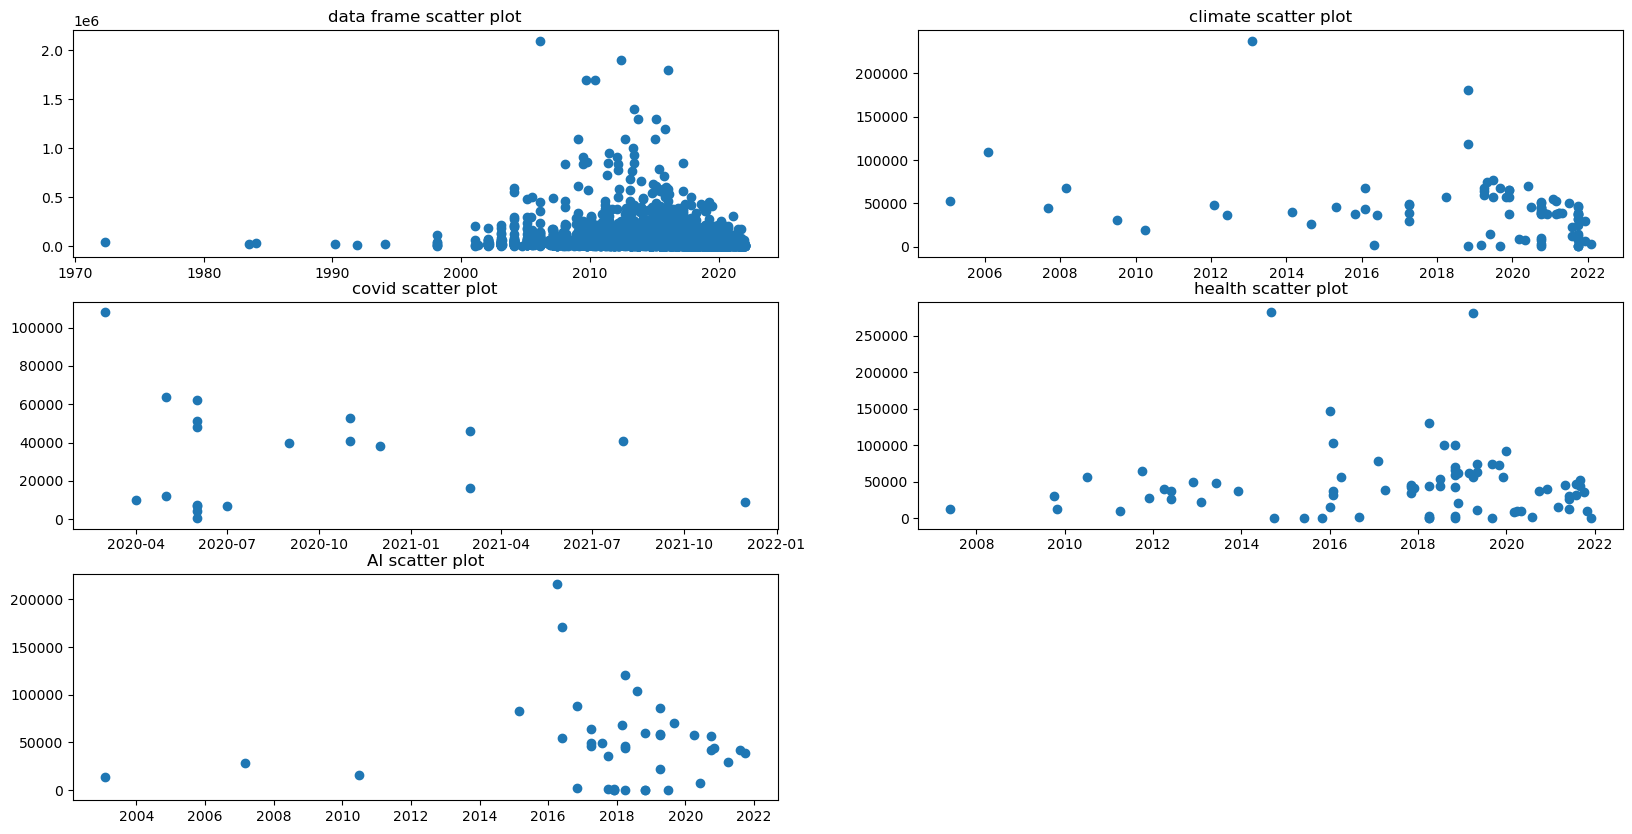

In [18]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 2, 1)
plt.title("data frame scatter plot")
plt.scatter(daTed["date"].values, daTed["likes"].values)

plt.subplot(3, 2, 2)
plt.title("climate scatter plot")
plt.scatter(daClimate["date"].values, daClimate["likes"].values)

plt.subplot(3, 2, 3)
plt.title("covid scatter plot")
plt.scatter(daCovid["date"].values, daCovid["likes"].values)

plt.subplot(3, 2, 4)
plt.title("health scatter plot")
plt.scatter(daHealth["date"].values, daHealth["likes"].values)

plt.subplot(3, 2, 5)
plt.title("AI scatter plot")
plt.scatter(daAI["date"].values, daAI["likes"].values)

plt.show()

> #### Dai due scatter plot visualizzate possiamo notare come il numero di visualizzazioni (e anche di like) col tempo sono aumentate raggiungendo un picco massimo nella decade 2010/2020 

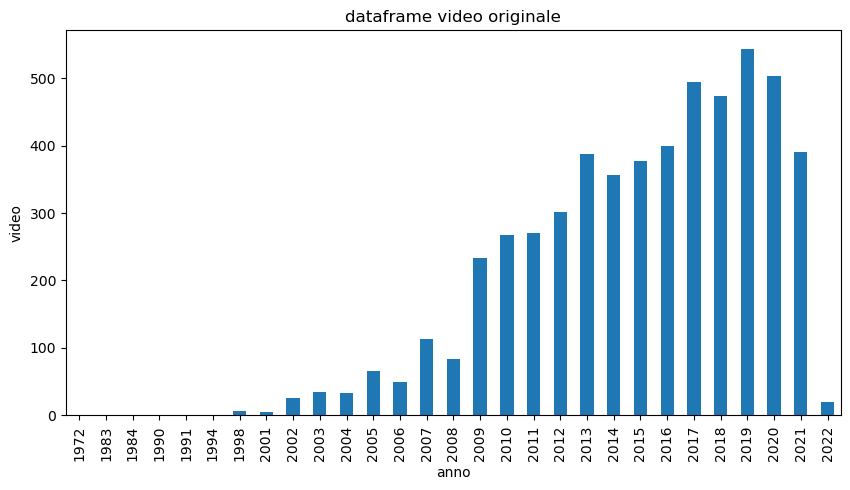

In [19]:
show_online_video(daTed, "dataframe video originale")

Dal seguente grafico, possiamo notare un apparente correlazione fra views e like

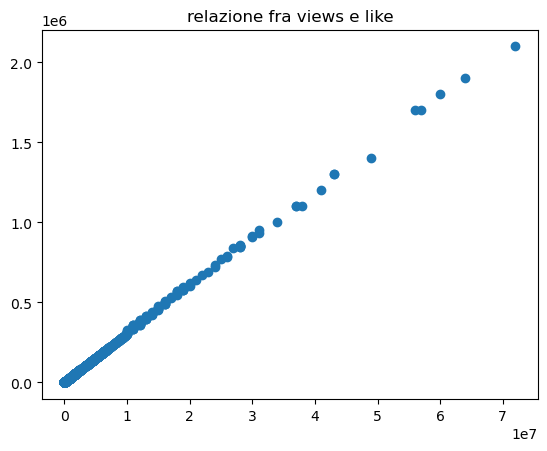

In [20]:
plt.title("relazione fra views e like")
plt.scatter(daTed["views"], daTed["likes"])

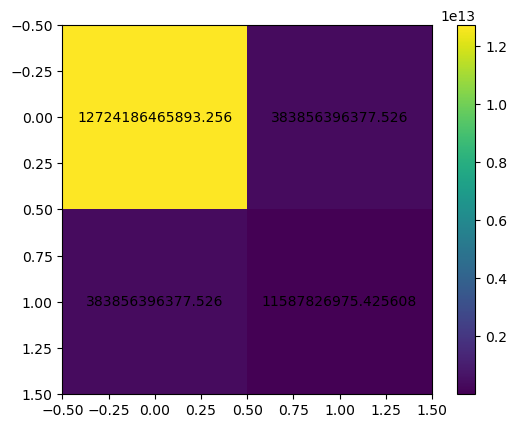

In [21]:
# matrice di covarianza

cov_matrix = daTed[["views", "likes"]].cov()
plt.imshow(cov_matrix)
plt.colorbar()
for (j,i),label in np.ndenumerate(cov_matrix):
    plt.text(i,j,label,ha='center',va='center')

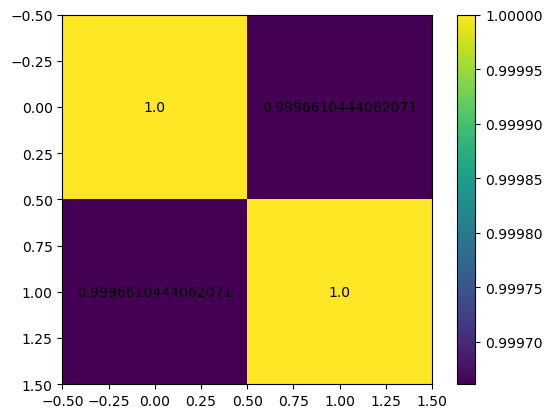

In [22]:
# matrice di correlazione

corr_matrix = daTed[["views", "likes",]].corr()
plt.imshow(corr_matrix)
plt.colorbar()

for (j,i),label in np.ndenumerate(corr_matrix):
    plt.text(i,j,label,ha='center',va='center')

#### OLAP


> #### Quantizzazione dei vari dati all'interno del dataset, vengono quantizzate: la data, il numero di visualizzazioni e il numero di like.
> #### Nella tabella di seguito si possono vedere come nel dataframe sono stati creati\aggiunti i seguenti nuovi campi: date_quant, views_quant e likes_quant che hanno l'intento di quantizzare rispettivamente i campi della date, del numero di view e del numero di like.

In [23]:
# Quantizzazione per decade

daTed.loc[daTed['date'].between(pd.to_datetime("1970", format='%Y'), pd.to_datetime("1979", format='%Y'), 'both'), 'date_quant'] = quantize_date[0]
daTed.loc[daTed['date'].between(pd.to_datetime("1980", format='%Y'), pd.to_datetime("1989", format='%Y'), 'both'), 'date_quant'] = quantize_date[1]
daTed.loc[daTed['date'].between(pd.to_datetime("1990", format='%Y'), pd.to_datetime("1999", format='%Y'), 'both'), 'date_quant'] = quantize_date[2]
daTed.loc[daTed['date'].between(pd.to_datetime("2000", format='%Y'), pd.to_datetime("2009", format='%Y'), 'both'), 'date_quant'] = quantize_date[3]
daTed.loc[daTed['date'].between(pd.to_datetime("2010", format='%Y'), pd.to_datetime("2019", format='%Y'), 'both'), 'date_quant'] = quantize_date[4]
daTed.loc[daTed['date'].between(pd.to_datetime("2020", format='%Y'), pd.to_datetime("2029", format='%Y'), 'both'), 'date_quant'] = quantize_date[5]

# Quantizzazione per quantità di views
## p.s. max views: 72M

daTed.loc[daTed['views'].between(0        , 9999    , 'both'), 'views_quant'] = quantize_views[0]
daTed.loc[daTed['views'].between(10000    , 99999   , 'both'), 'views_quant'] = quantize_views[1]
daTed.loc[daTed['views'].between(100000   , 499999  , 'both'), 'views_quant'] = quantize_views[2]
daTed.loc[daTed['views'].between(500000   , 999999  , 'both'), 'views_quant'] = quantize_views[3]
daTed.loc[daTed['views'].between(1000000  , 19999999, 'both'), 'views_quant'] = quantize_views[4]
daTed.loc[daTed['views'].between(20000000 , 80000000, 'both'), 'views_quant'] = quantize_views[5]

# Quantizzazione per quantità di likes
## p.s. max likes: 2.1M

daTed.loc[daTed['likes'].between(0       , 9999    , 'both'), 'likes_quant'] = quantize_likes[0]
daTed.loc[daTed['likes'].between(10000   , 99999   , 'both'), 'likes_quant'] = quantize_likes[1]
daTed.loc[daTed['likes'].between(100000  , 499999  , 'both'), 'likes_quant'] = quantize_likes[2]
daTed.loc[daTed['likes'].between(500000  , 999999  , 'both'), 'likes_quant'] = quantize_likes[3]
daTed.loc[daTed['likes'].between(1000000 , 1000000 , 'both'), 'likes_quant'] = quantize_likes[4]
daTed.head()

# Quantizzazione per tag
for theme in theme_list:
    daTed.loc[daTed["title"].str.contains(theme), 'theme'] = theme

daTed.head()


/tmp/ipykernel_3711/641265950.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '70's' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  daTed.loc[daTed['date'].between(pd.to_datetime("1970", format='%Y'), pd.to_datetime("1979", format='%Y'), 'both'), 'date_quant'] = quantize_date[0]
/tmp/ipykernel_3711/641265950.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<10K' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  daTed.loc[daTed['views'].between(0        , 9999    , 'both'), 'views_quant'] = quantize_views[0]
/tmp/ipykernel_3711/641265950.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<10K' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
 

,title,author,date,views,likes,link,date_quant,views_quant,likes_quant,theme
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,20's,100K-500K,10K-100K,NaN
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,20's,100K-500K,<10K,NaN
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,20's,100K-500K,10K-100K,NaN
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,20's,100K-500K,10K-100K,climate
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,20's,<10K,<10K,NaN


In [24]:
# costruzione OLAP
##OLAP che ha come dimensioni x: le date quantizzate, y: le views quantizzate e z: il nome del tema
THEME_OLAP = np.zeros((len(quantize_date) , len(quantize_views) , len(theme_list)))

for z in range(0, len(theme_list)):
    theme_ted = daTed[daTed['theme'] == theme_list[z]]
    for y in range(0, len(quantize_views)):
        for x in range(0, len(quantize_date)):
            THEME_OLAP[x,y,z] = np.sum(
                            (theme_ted['views_quant'] == quantize_views[y]) 
                            & (theme_ted['date_quant']  == quantize_date[x])
                          )

##OLAP che ha come dimensioni: x: le date quantizzate, y: le views quantizzate e z: il numero di like quantizzati
LIKE_OLAP  = np.zeros((len(quantize_date), len(quantize_views), len(quantize_likes)))

for z in range(0, len(quantize_likes)):
    like_ted = daTed[daTed['likes_quant'] == quantize_likes[z]]
    for y in range(0, len(quantize_views)):
        for x in range(0, len(quantize_date)):
            LIKE_OLAP[x,y,z] = np.sum(
                            (like_ted['views_quant'] == quantize_views[y]) 
                            & (like_ted['date_quant']  == quantize_date[x])
                          )

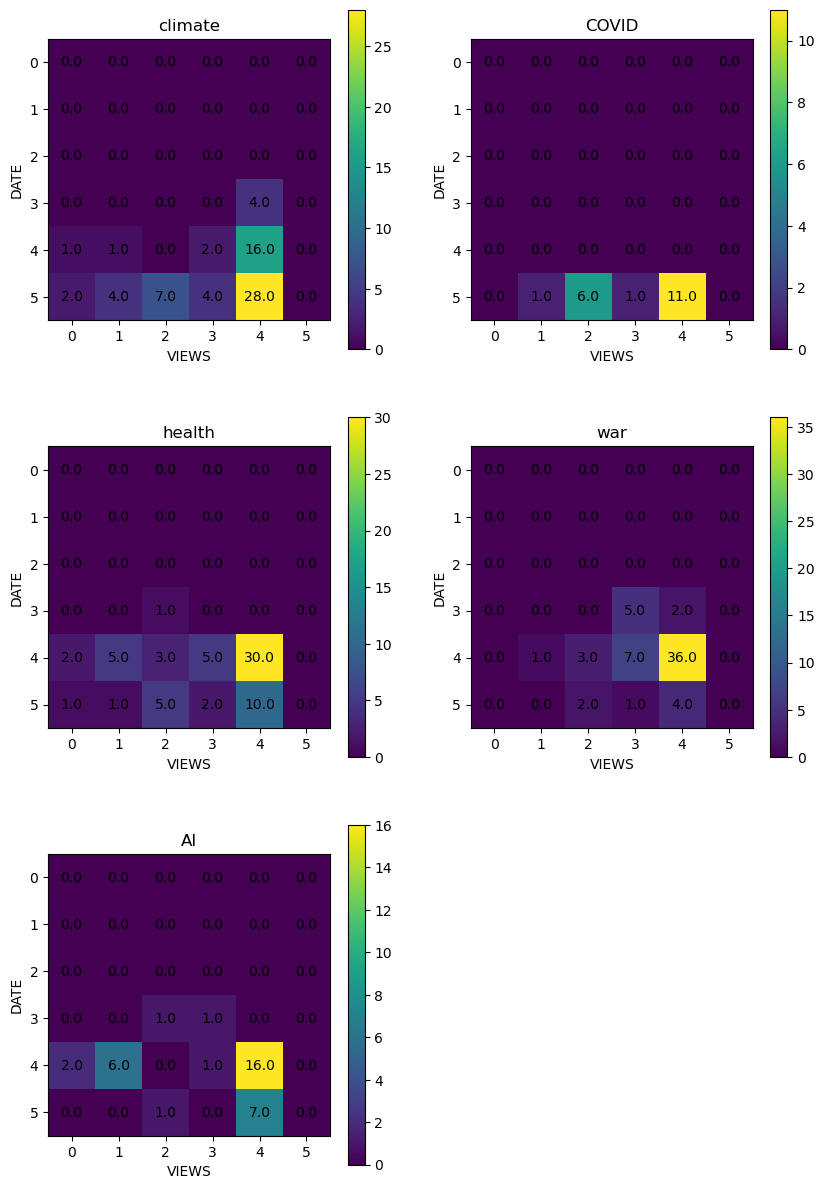

In [25]:
# Visualizziamo la matrice
all_dim_olap(THEME_OLAP, "VIEWS", "DATE", theme_list)

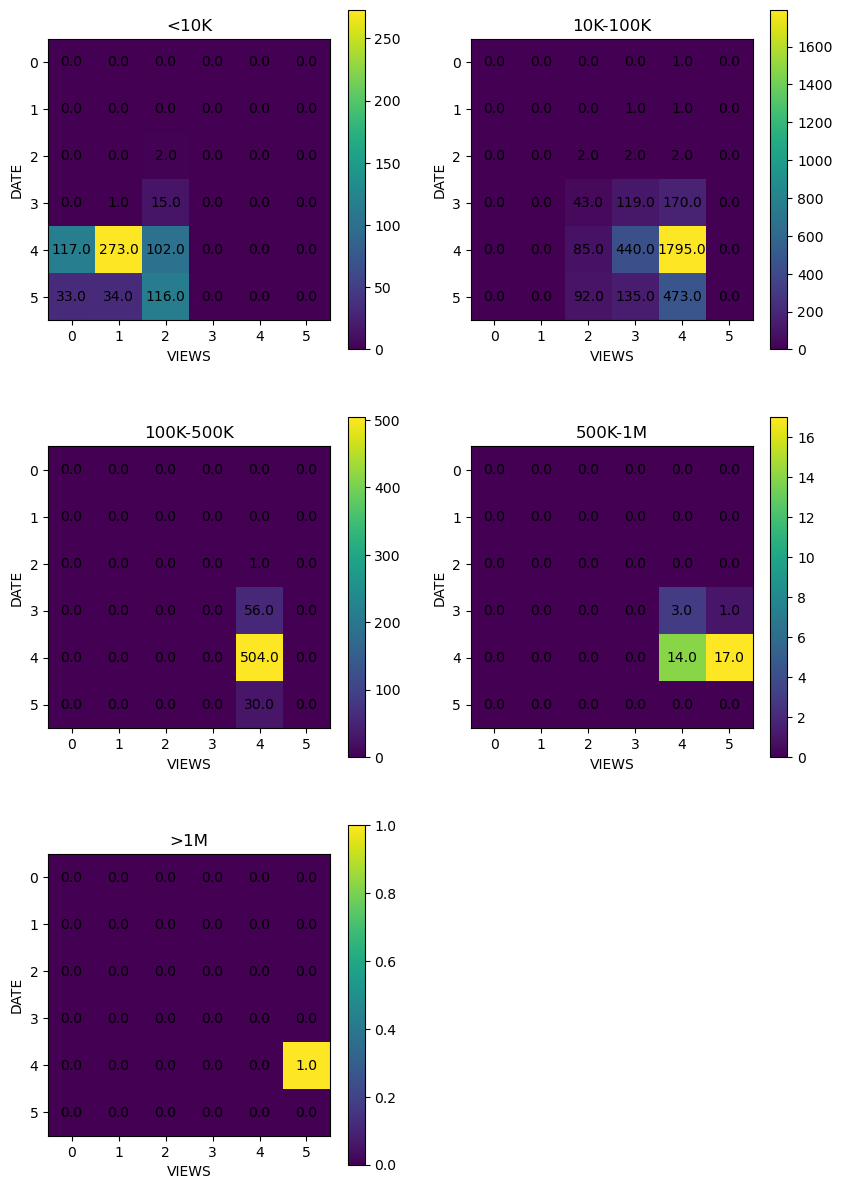

In [26]:
all_dim_olap(LIKE_OLAP, "VIEWS", "DATE", quantize_likes)

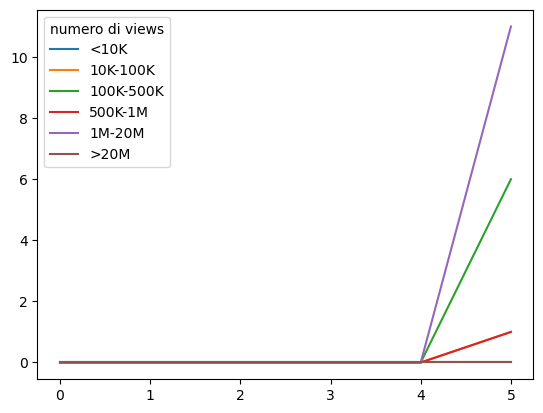

In [27]:
# Slicing
slice_theme = THEME_OLAP[:,:,1]

# DA MODIFICARE, ETICHETTE ERRONEE

# plt.title('Video del 10\' rispetto ai like e visualizzazioni')
# plt.xlabel('Data video')
# plt.ylabel('Views')
plt.plot(slice_theme[:,:])
plt.legend(quantize_views, title="numero di views")

<BarContainer object of 6 artists>

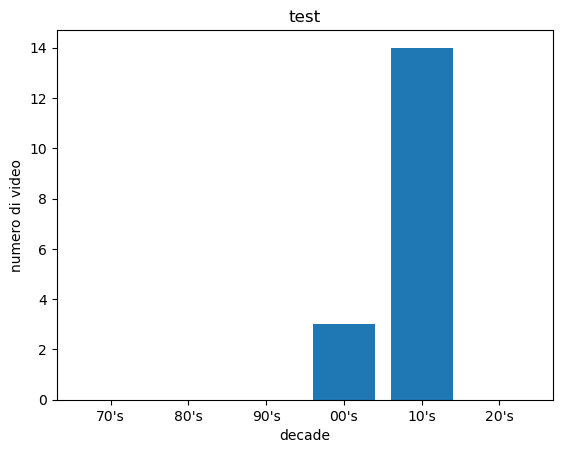

In [28]:
# dicing
plt.title('test')
plt.ylabel('numero di video')
plt.xlabel("decade")
plt.bar(quantize_date, LIKE_OLAP[:, 4, 3])

## 3. Test Statistico

> + #### In questo contesto appliccheremo il T-test per verificare quella che sono le differenze presenti all'interno dei vari dataset creati, in termini di media e di moda.

 Facciamo dei box-plot

<Axes: title={'center': 'views'}, xlabel='theme'>

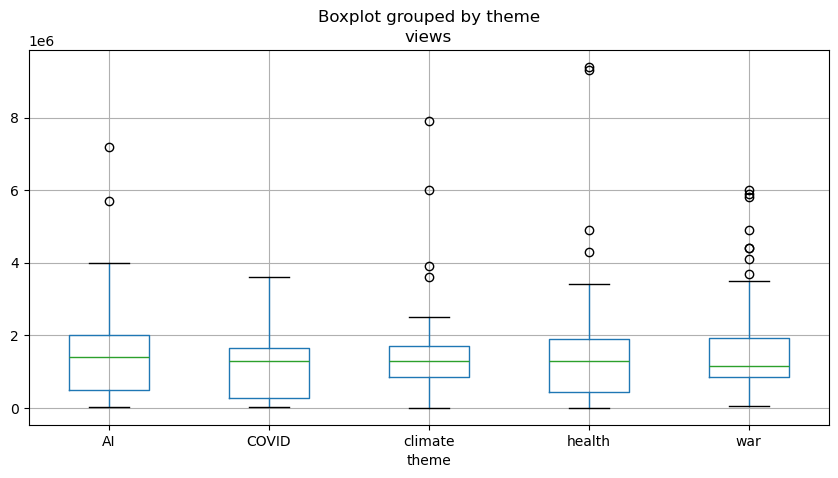

In [29]:
#codice qui 
daThemed = daTed.dropna(axis=0, subset=['theme'])
daThemed.boxplot(column = "views", by="theme", figsize=(10, 5))

In [30]:
print("Di seguito sono elencati i risultati dei Ttest condotti sui df: covid, climate health e war")
# COVID NON VA BENE, troppi pochi dati, almeno 30
# BISOGNA NORMALIZZARE CON sklearn.preprocessing.MinMaxScaler

print_ttest_1samp(daCovid, daTed, "views", "Covid")
print_ttest_1samp(daWar, daTed, "views", "War")
print_ttest_1samp(daClimate, daTed, "views", "Climate")
print_ttest_1samp(daHealth, daTed, "views", "Health")
print_ttest_1samp(daAI, daTed, "views", "AI")

Di seguito sono elencati i risultati dei Ttest condotti sui df: covid, climate health e war

t-test on  Covid :
Valore test:  -4.796129395978688
P-value:  0.00012555491569504526

t-test on  War :
Valore test:  -2.8069144966575936
P-value:  0.006351306618612387

t-test on  Climate :
Valore test:  -5.4341411776620525
P-value:  5.166238729679369e-07

t-test on  Health :
Valore test:  -2.931383165555605
P-value:  0.004455723268192425

t-test on  AI :
Valore test:  -1.9943433484181927
P-value:  0.052961378414339316


## 4. Metodo Predittivo


> ##### Come metodo predittivo per il nostro laboratorio abbiamo cercato di visualizzare quella che potrebbe essere una corrispondenza tra il numero di like e di views che un video può avere se pubblicato in una certa data

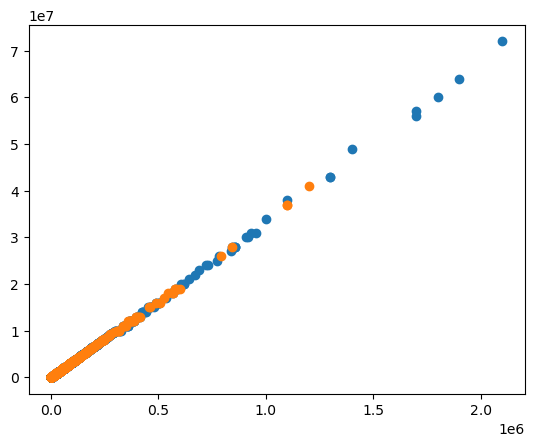

In [31]:
x_train, x_valid, y_train, y_valid = train_test_split(daTed[['likes']], daTed['views'], test_size=0.2, random_state=1)

plt.scatter(x_train, y_train)
plt.scatter(x_valid, y_valid)

Intercept:  -14042.223504369846
Coefficient:  [33.16574585]


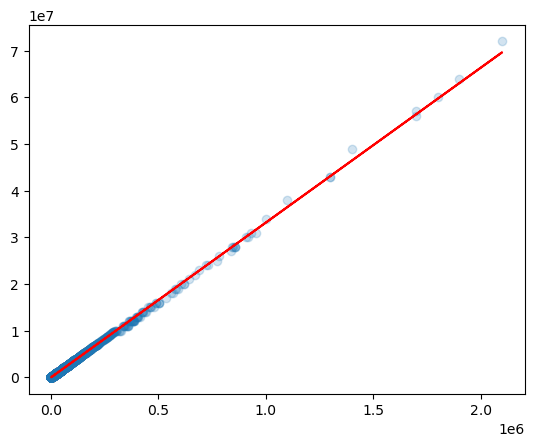

In [32]:
regressor = LinearRegression()
lin_reg = regressor.fit(x_train, y_train)

print('Intercept: ', lin_reg.intercept_)
print('Coefficient: ', lin_reg.coef_)

# segue y = ax + b
y_pred_train = lin_reg.coef_ * x_train + lin_reg.intercept_

plt.scatter(x_train, y_train, alpha=0.2)
plt.plot(x_train, y_pred_train, color='r')

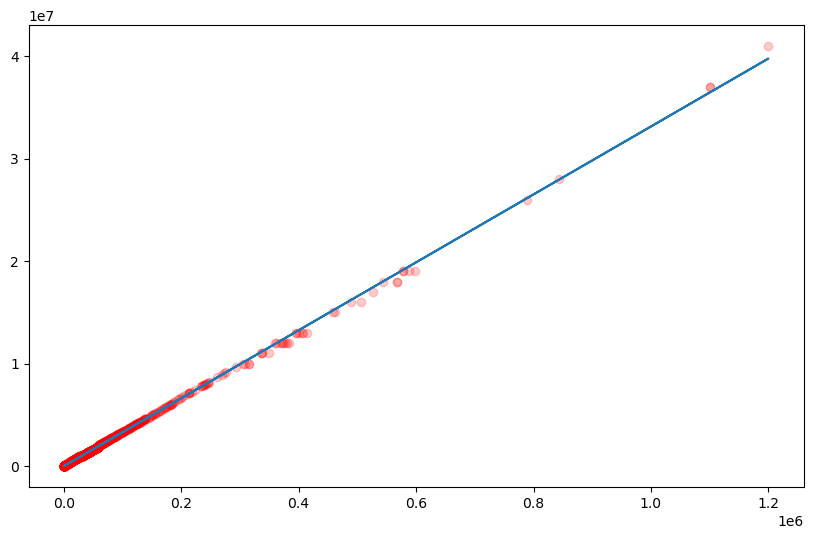

In [33]:
#codice qui 
y_pred = lin_reg.predict(x_valid)
plt.figure(figsize=(10,6))
plt.plot(x_valid, y_pred)
plt.scatter(x_valid, y_valid,c='r',alpha=0.2)

Testiamo la qualità del nostro metodo predittivo

In [34]:
import sklearn.metrics as metrics 
print ('MAE:', metrics.mean_absolute_error(y_valid, y_pred))
print ('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

MAE: 37775.01824830719
MSE: 8737302758.115524
RMSE: 93473.54041714438


Proviamo ora a misurare i valori su di un modello nullo

In [35]:
# Idea: osservo se il mio modello di predizione è più efficace (errore più basso) di un modello nullo in cui si tira a caso sempre la media

#calcolate lo score medio
mean_views = y_valid.mean()

# create la nuova x con lo stesso numero di campioni del validation set originale, e con tutti i valori uguali al valore medio dello score appena calcolato
null_model_y = [mean_views] * y_valid.shape[0]

#stampate gli errori
print ('MAE:', metrics.mean_absolute_error(y_valid, null_model_y))
print ('MSE:', metrics.mean_squared_error(y_valid, null_model_y))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, null_model_y)))

MAE: 1745883.0642689634
MSE: 11808525886038.516
RMSE: 3436353.574072161


### Regressione Logistica

In [36]:
#creiamo la colonna daTed['above_average_views']
daTed['above_average_views'] = (daTed['views'] > daTed['views'].mean()).astype(int)

In [37]:
x = daTed[["views"]]
y = daTed['above_average_views'] # mi ritorna se il valore di views sta sopra o sotto la media
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=1)

clf = LogisticRegression()

clf.fit(X_train, y_train) # alleno sui dati di training

y_hat_train = clf.predict(X_train)
y_hat_valid = clf.predict(X_valid)
print('Training:',clf.score(X_train, y_train))
print('Validation:',clf.score(X_valid, y_valid))

Training: 0.2658547794117647
Validation: 0.2693014705882353


In [38]:
#codice qui per modello nullo (ritorna sempre la classe più comune all'interno del mio dato)
print(np.sum(daTed['above_average_views']==1) / daTed['above_average_views'].shape[0]) # stampo l'accuratezza del modello nullo

0.2665441176470588


## 5. Clustering

 ## USEFUL IN THE FUTURE

In [39]:
# import matplotlib.pyplot as plt 
# # Loading dataset
# iris_df = datasets.load_iris()

# # Declaring Model
# model = KMeans(n_clusters=3)

# # Fitting Model
# model.fit(iris_df.data)

# # Predicitng a single input
# predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# # Prediction on the entire data
# all_predictions = model.predict(iris_df.data)

# # Printing Predictions
# print(predicted_label)
# print(all_predictions)


# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :3]  # we only take the first two features.
# y = iris.target


# fig = plt.figure(figsize=(10,10))
# plt = fig.add_subplot(111, projection='3d')
# plt.scatter(X[:,0],X[:,1],X[:,2], 
#             c=all_predictions, edgecolor='red', s=40, alpha = 0.5)
# plt.set_title("First three PCA directions")
# plt.set_xlabel("Educational_Degree")
# plt.set_ylabel("Gross_Monthly_Salary")
# plt.set_zlabel("Claim_Rate")
